In [1]:
# Part-1 Data Preprocessing
# Importing the Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the datasets
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# define target variable and Independent variable

In [4]:
X = dataset.iloc[:, 3:13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
Y = dataset.iloc[:, 13]
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [6]:
# Creating dummy variabe for catergorical data

In [7]:
geography = pd.get_dummies(X["Geography"], drop_first = True)
gender = pd.get_dummies(X["Gender"], drop_first = True)

In [8]:
# Concatenate the dataframes

In [9]:
X = pd.concat([X, geography, gender], axis = 1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [10]:
# drop the Unnessesery Columns

In [11]:
X=X.drop(['Geography','Gender'],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [12]:
# Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [14]:
# Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [ ]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [ ]:
# Initialising the ANN

In [29]:
classifier = Sequential()

In [30]:
# Adding the input layer and the first hidden layer

In [35]:
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = "relu", input_dim = 11 ))

In [31]:
# Adding the second hidden layer

In [37]:
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = "relu"))

In [38]:
# Adding the output layer

In [39]:
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = "sigmoid"))

In [33]:
# Compiling the ANN

In [41]:
classifier.compile(optimizer = 'Adamax', loss = "binary_crossentropy", metrics = ["accuracy"])

In [42]:
# Fitting the ANN to the Training set

In [44]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.7177 - accuracy: 0.5438 - val_loss: 0.5487 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5167 - accuracy: 0.7962 - val_loss: 0.5049 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4983 - accuracy: 0.7962 - val_loss: 0.4961 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4879 - accuracy: 0.7962 - val_loss: 0.4867 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4771 - accuracy: 0.7962 - val_loss: 0.4776 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4666 - accuracy: 0.7962 - val_loss: 0.4684 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4565 - accuracy: 0.7962 - val_loss: 0.4604 - val_accuracy: 0.7955

Epoch 58/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3605 - accuracy: 0.8548 - val_loss: 0.3790 - val_accuracy: 0.8436
Epoch 59/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3598 - accuracy: 0.8546 - val_loss: 0.3786 - val_accuracy: 0.8436
Epoch 60/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3594 - accuracy: 0.8563 - val_loss: 0.3779 - val_accuracy: 0.8429
Epoch 61/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3588 - accuracy: 0.8543 - val_loss: 0.3774 - val_accuracy: 0.8432
Epoch 62/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3582 - accuracy: 0.8576 - val_loss: 0.3768 - val_accuracy: 0.8440
Epoch 63/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3578 - accuracy: 0.8563 - val_loss: 0.3763 - val_accuracy: 0.8444
Epoch 64/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3572 - accuracy: 0.8569 - val_loss: 0.3757 - val_accuracy:

In [45]:
# list all data in history

In [46]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


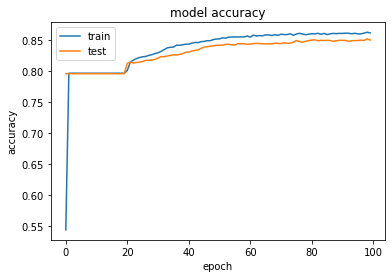

In [52]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
# summarize history for loss

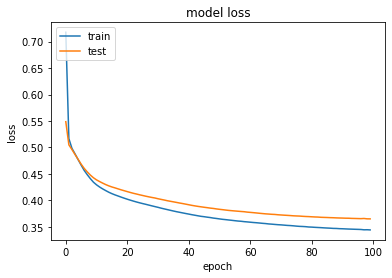

In [54]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [55]:
# Part 3 - Making the predictions and evaluating the model

In [56]:
# Predicting the Test set results

In [58]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [59]:
# Making the Confusion Matrix

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1509,   86],
       [ 194,  211]], dtype=int64)

In [62]:
# Calculate the Accuracy

In [66]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.86